# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 2.2

Utilizando dataset do arquivo circulos.csv faça a clusterização utilizando k-means e DBSCAN.
Faça a plotagem da clusterização gerada (com cores diferentes para cada cluster).

a) Qual é a melhor quantidade de Clusters?

### *A melhor quantidade de clusters é 2*

b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?

### *A melhor técnica é a DBScan, pois conseguiu separar em 2 clusters bem característicos*

In [40]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Leitura do dataset
ds = pd.read_csv('data/2.2_circulos.csv', sep=',', engine='python')

In [42]:
ds.head()

,Unnamed: 0,X,Y
0,0,-0.262199,0.456958
1,1,-0.955271,-0.377646
2,2,0.119759,1.004204
3,3,-0.817525,-0.636813
4,4,0.341931,0.408966


In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1500 non-null   int64  
 1   X           1500 non-null   float64
 2   Y           1500 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [44]:
# Limpando IDs
ds.drop(['Unnamed: 0'], axis=1, inplace=True)

In [45]:
# Normaliza os Dados:
#scaler = StandardScaler()
scaler = MinMaxScaler()
ds_norm = scaler.fit_transform(ds)

In [46]:
# numero de iteracoes de K
iter = 20

# K-Means

In [47]:
scores = []
inertias =[]
for i in tqdm(range(2, iter)):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(ds_norm)
    inertias.append(kmeans.inertia_)
    scores.append(silhouette_score(ds.values, kmeans.labels_))

100%|██████████| 18/18 [00:02<00:00,  7.26it/s]


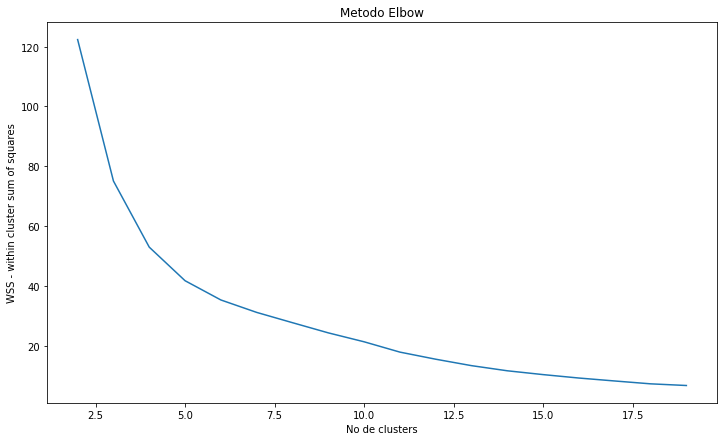

In [48]:
plt.figure(figsize = (12,7))
plt.plot(range(2, iter), inertias)
plt.title('Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

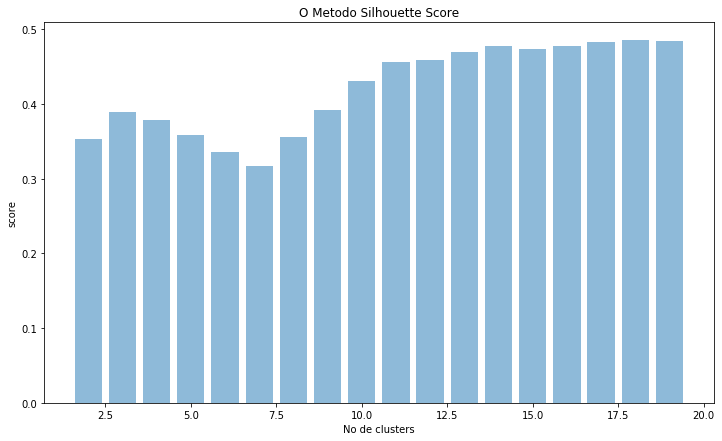

In [49]:
plt.figure(figsize = (12,7))
plt.bar(range(2, iter), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

In [50]:
# numero de clusters escolhido
num_clusters = 11

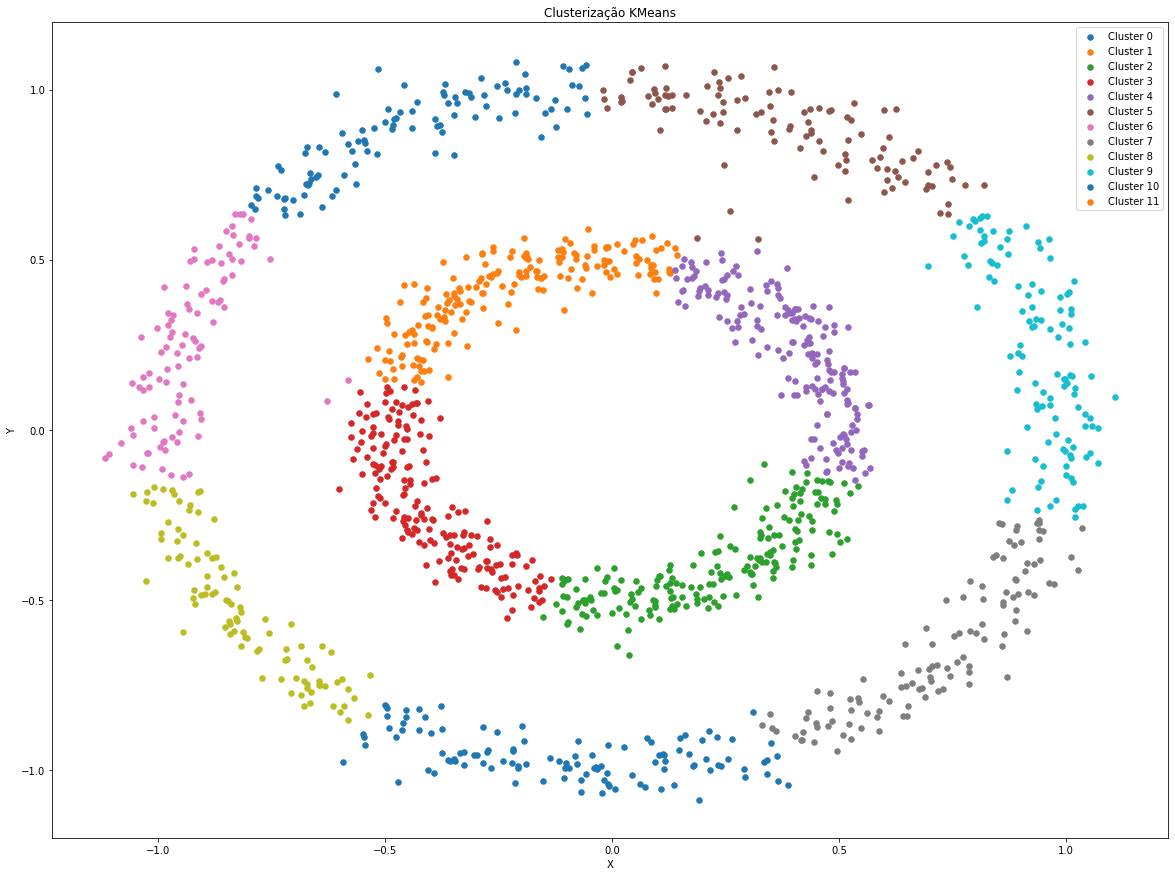

In [51]:
bestKmeans = KMeans(n_clusters = num_clusters, max_iter=100).fit(ds_norm)
clusters = pd.concat([ds, pd.DataFrame({'cluster':bestKmeans.labels_})], axis=1)
x = ds.values
labels = bestKmeans.labels_

plt.figure(figsize = (20,15))
plt.title('Clusterização KMeans')
plt.xlabel('X')
plt.ylabel('Y')
for cluster_number in range(0,num_clusters+1):
    label = "Cluster %s" % (cluster_number)
    plt.scatter(x[labels == cluster_number, 0], x[labels == cluster_number, 1], s = 30, label = label)
plt.legend()
plt.show()

# DBSCAN

In [52]:
arr_eps = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.015]
maior_silhouette_score = 0
melhor_eps = 0
qtd_clusters = 0
for eps_val in arr_eps:
    db = DBSCAN(eps=eps_val, min_samples=20).fit(ds_norm)
    labels = db.labels_
    print('-------------')
    print('EPS: {}'.format(eps_val))
    print('Clusters: {}'.format(set(labels)))
    if (len(set(labels)) > 1):
        print('Silhouette Score: {}'.format(silhouette_score(ds_norm, labels)))
        if silhouette_score(ds_norm, labels) > maior_silhouette_score:
            maior_silhouette_score = silhouette_score(ds_norm, labels)
            melhor_eps = eps_val
            qtd_clusters = len(set(labels)) - 1
print('-------------')
print('Maior Silhouette Score = {}'.format(maior_silhouette_score))
print('Melhor EPS = {}'.format(melhor_eps))
print('Numero de clusters = {}'.format(qtd_clusters))

-------------
EPS: 0.01
Clusters: {-1}
-------------
EPS: 0.025
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, -1}
Silhouette Score: -0.451949415704461
-------------
EPS: 0.05
Clusters: {0, 1, 2, 3, 4, -1}
Silhouette Score: 0.0310260178882926
-------------
EPS: 0.075
Clusters: {0, 1}
Silhouette Score: 0.113455438409288
-------------
EPS: 0.1
Clusters: {0}
-------------
EPS: 0.125
Clusters: {0}
-------------
EPS: 0.015
Clusters: {-1}
-------------
Maior Silhouette Score = 0.113455438409288
Melhor EPS = 0.075
Numero de clusters = 1


In [53]:
num_clusters = qtd_clusters
db = DBSCAN(eps=melhor_eps, min_samples=iter).fit(ds_norm)
ds['cluster'] = db.labels_
y_dbscan = ds['cluster'].values

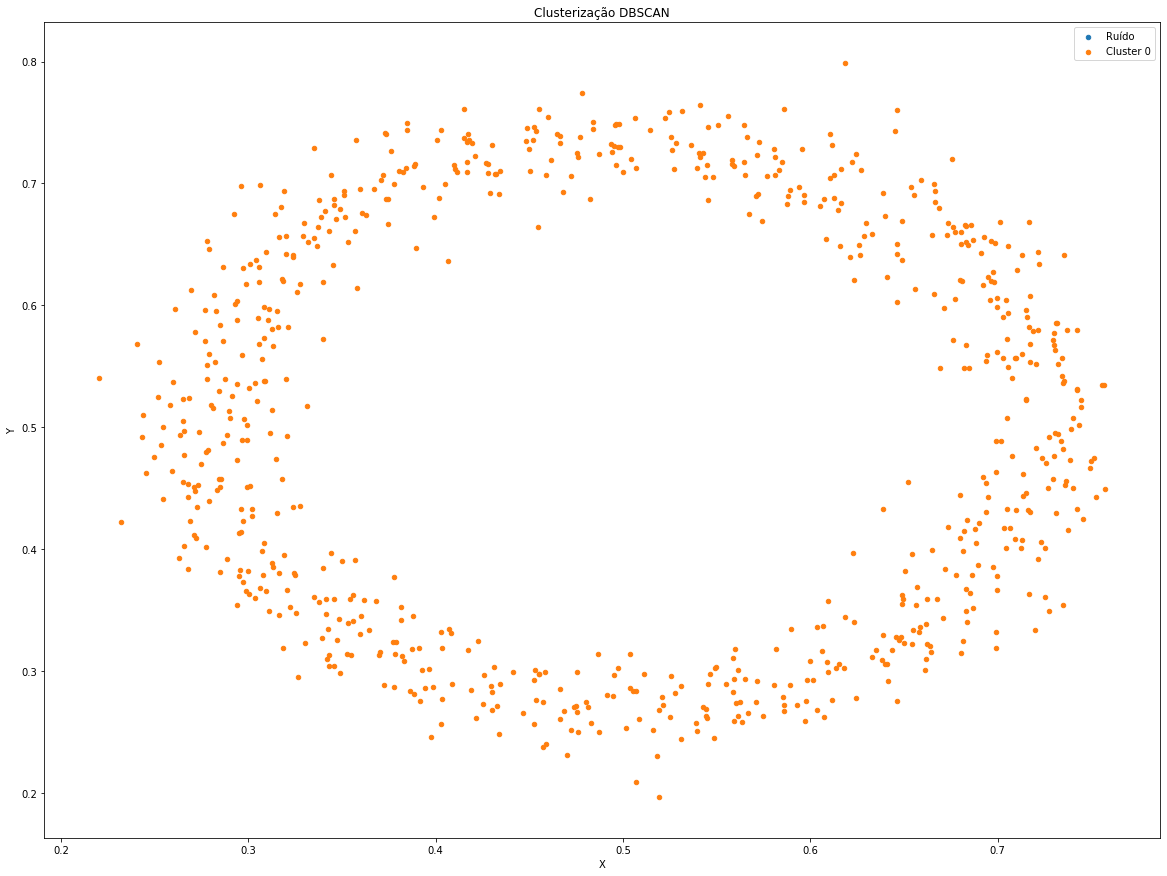

In [54]:
plt.figure(figsize = (20,15))
plt.title('Clusterização DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
for cluster_number in range(-1,num_clusters):
    if cluster_number >= 0:
        label = "Cluster %s" % (cluster_number)
    else:
        label = "Ruído"
    plt.scatter(ds_norm[y_dbscan == cluster_number, 0], ds_norm[y_dbscan == cluster_number, 1], s = 20, label = label)
plt.legend()
plt.show()

## DBScan com 2 clusters

In [55]:
num_clusters = 2
db = DBSCAN(eps=melhor_eps, min_samples=iter).fit(ds_norm)
ds['cluster'] = db.labels_
y_dbscan = ds['cluster'].values

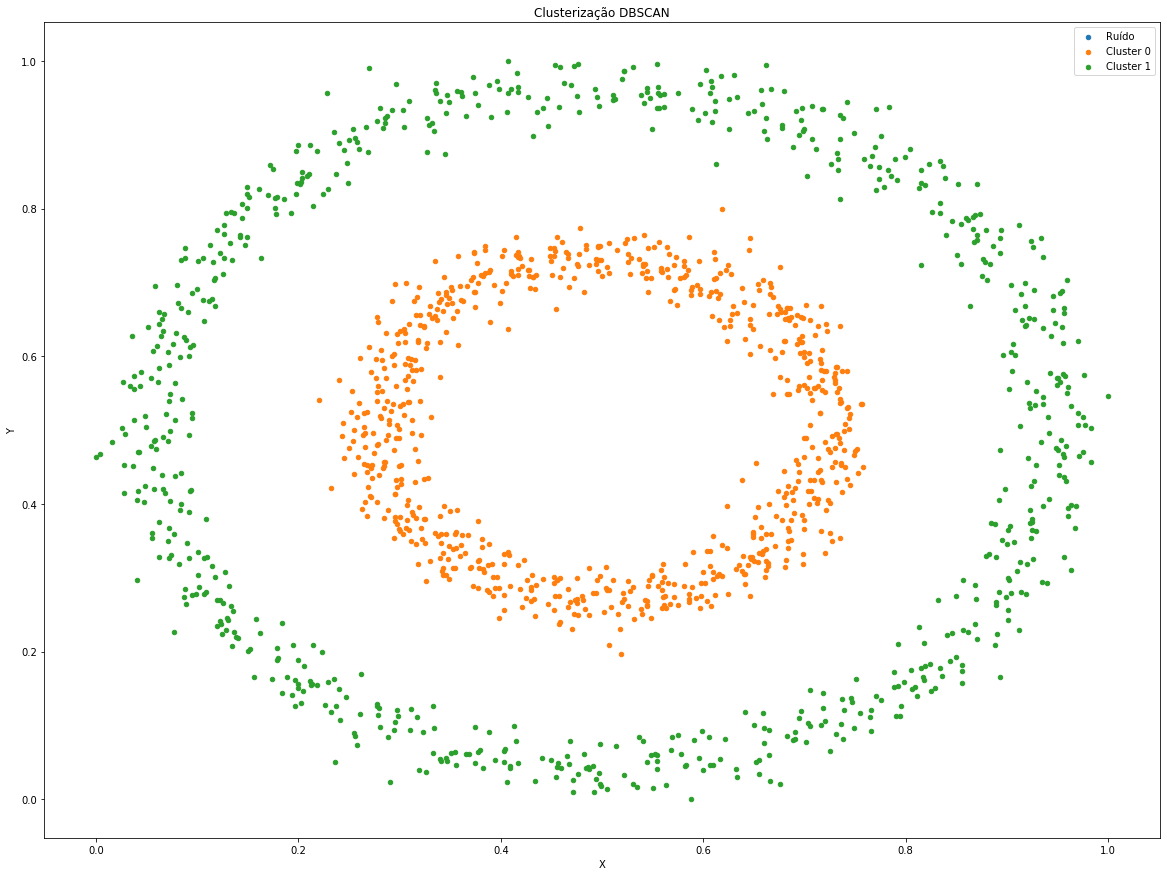

In [56]:
plt.figure(figsize = (20,15))
plt.title('Clusterização DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
for cluster_number in range(-1,num_clusters):
    if cluster_number >= 0:
        label = "Cluster %s" % (cluster_number)
    else:
        label = "Ruído"
    plt.scatter(ds_norm[y_dbscan == cluster_number, 0], ds_norm[y_dbscan == cluster_number, 1], s = 20, label = label)
plt.legend()
plt.show()